# Imoprting dependencies

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
%matplotlib inline

# Loading data

In [6]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# data preprocessing 

In [7]:
df.shape

(10000, 14)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [123]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [126]:
X.shape

(10000, 10)

In [127]:
y.shape

(10000,)

In [19]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [122]:
df['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

# France=0 , Germany=1 , Spain=2

In [121]:
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

# after lablining male=1 , female=0

In [24]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

# EDA

In [15]:
df.isnull().sum().sum()

0

In [18]:
df.duplicated().sum()

0

In [20]:
df['Balance'] = df['Balance'].astype(int)

In [21]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [22]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int32 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int32 
 13  Exited           10000 non-null  int64 
dtypes: int32(2), int64(9), object(3)
memory usage: 1015.8+ KB


# Encode object variables by label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0


# Droping unnecessary columns 

In [33]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0,1,1,1,101348,1
1,608,2,Female,41,1,83807,1,0,1,112542,0
2,502,0,Female,42,8,159660,3,1,0,113931,1
3,699,0,Female,39,1,0,2,0,0,93826,0
4,850,2,Female,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0,2,1,0,96270,0
9996,516,0,Male,35,10,57369,1,1,1,101699,0
9997,709,0,Female,36,7,0,1,0,1,42085,1
9998,772,1,Male,42,3,75075,2,1,0,92888,1


In [39]:
df['Geography']=LabelEncoder().fit_transform(df['Geography'])

In [40]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [41]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CreditScore      10000 non-null  int64
 1   Geography        10000 non-null  int64
 2   Gender           10000 non-null  int64
 3   Age              10000 non-null  int64
 4   Tenure           10000 non-null  int64
 5   Balance          10000 non-null  int32
 6   NumOfProducts    10000 non-null  int64
 7   HasCrCard        10000 non-null  int64
 8   IsActiveMember   10000 non-null  int64
 9   EstimatedSalary  10000 non-null  int32
 10  Exited           10000 non-null  int64
dtypes: int32(2), int64(9)
memory usage: 781.4 KB


# correlation heatmap

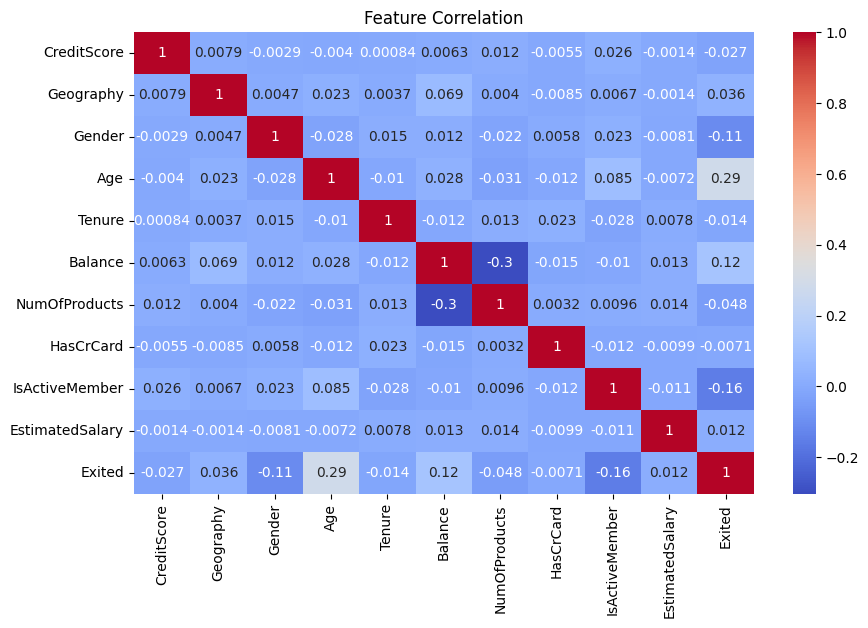

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Spliting data into X,y

In [42]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initializing models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)

In [47]:
# Training models
log_reg.fit(X_train, y_train)

C:\Users\bossh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
# Training models
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

#  Predictions

In [51]:
log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [87]:
y_pred=log_reg.predict(X_test)
print(classification_report(y_test,y_pred))
print('ROC AUC Score:', roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

ROC AUC Score: 0.5285780562456556


# Evaluation

In [60]:
log_reg_metrics = evaluate_model(y_test, log_reg_preds)
rand_forest_metrics = evaluate_model(y_test, rand_forest_preds)

In [52]:
def evaluate_model(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    return accuracy, precision, recall, f1, roc_auc

# Display the eval metrics

In [61]:
print("Logistic Regression Metrics: ", log_reg_metrics)
print("Random Forest Metrics: ", rand_forest_metrics)

Logistic Regression Metrics:  (0.8, 0.4507042253521127, 0.08142493638676845, 0.13793103448275862, 0.5285780562456556)
Random Forest Metrics:  (0.8655, 0.756198347107438, 0.46564885496183206, 0.5763779527559055, 0.7144672401753778)


# Checking models score

In [64]:
log_reg.score(X_test,y_test)

0.8

In [65]:
rand_forest.score(X_test,y_test)

0.8655

# Visualization insights

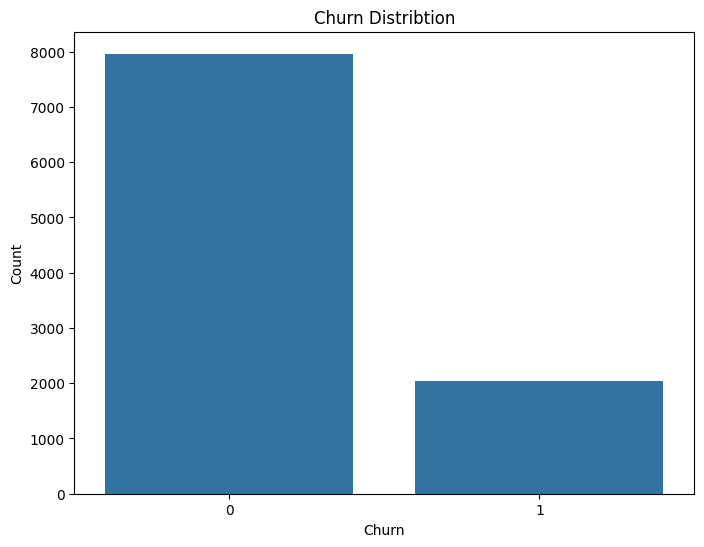

In [124]:
# Churn Distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribtion')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

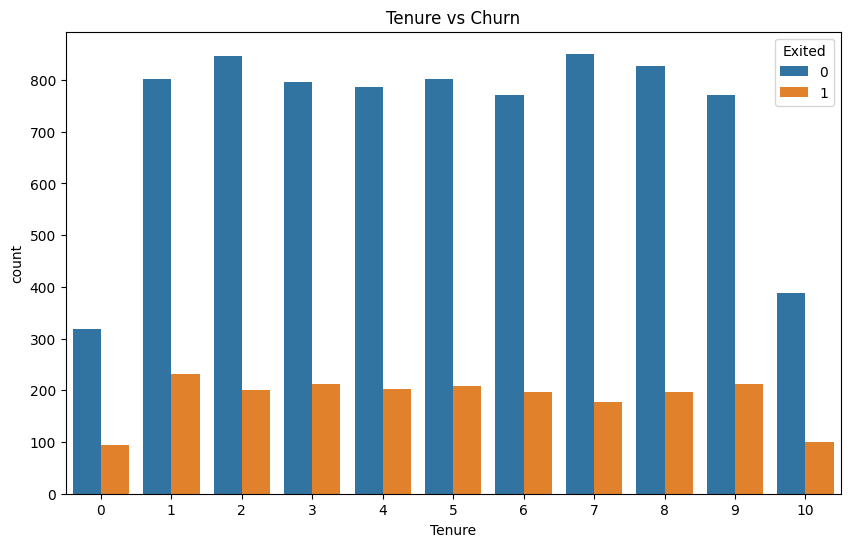

In [104]:
# bar plots Tenure vs Churn 
plt.figure(figsize=(10,6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Tenure vs Churn')
plt.show()

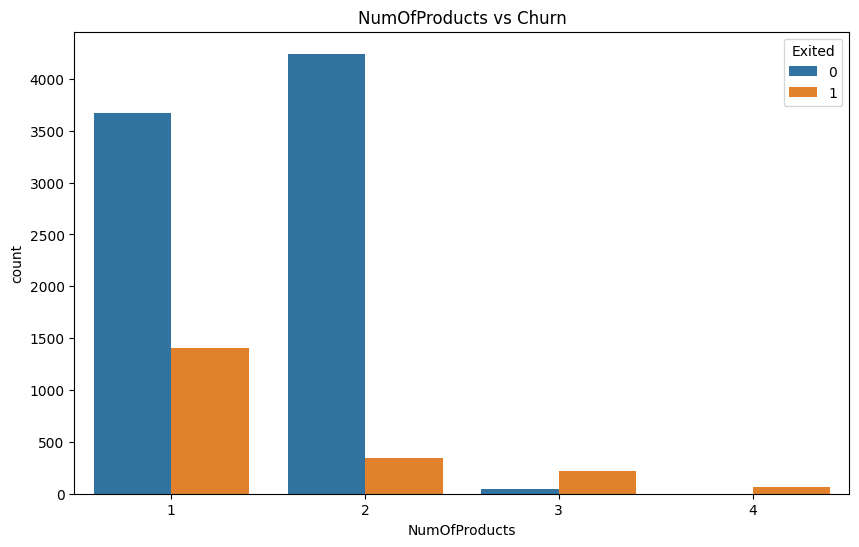

In [105]:
# Number Of Products vs Churn 
plt.figure(figsize=(10,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('NumOfProducts vs Churn')
plt.show()

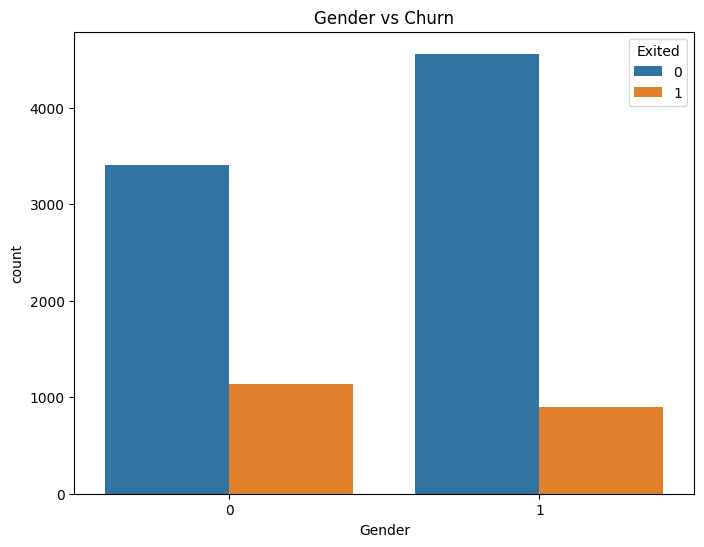

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Churn')
plt.show()

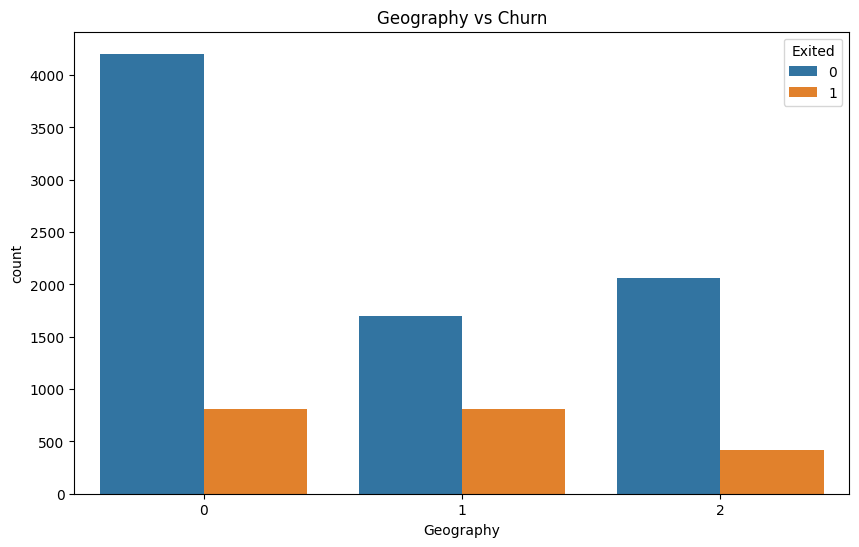

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography vs Churn')
plt.show()

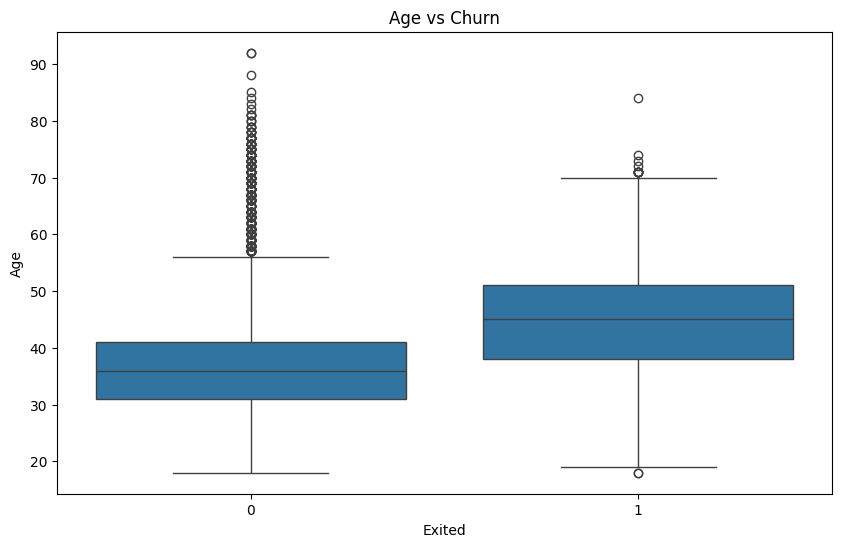

In [114]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()

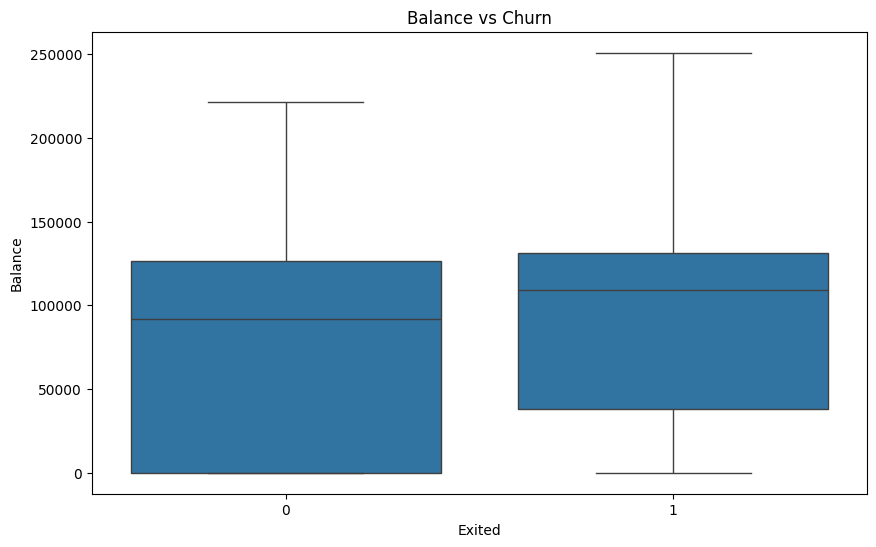

In [118]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()

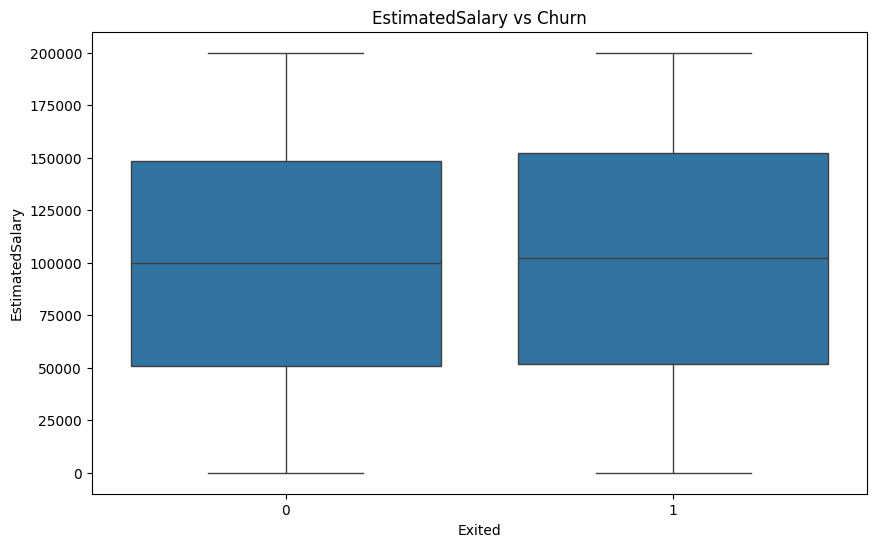

In [120]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary vs Churn')
plt.show()

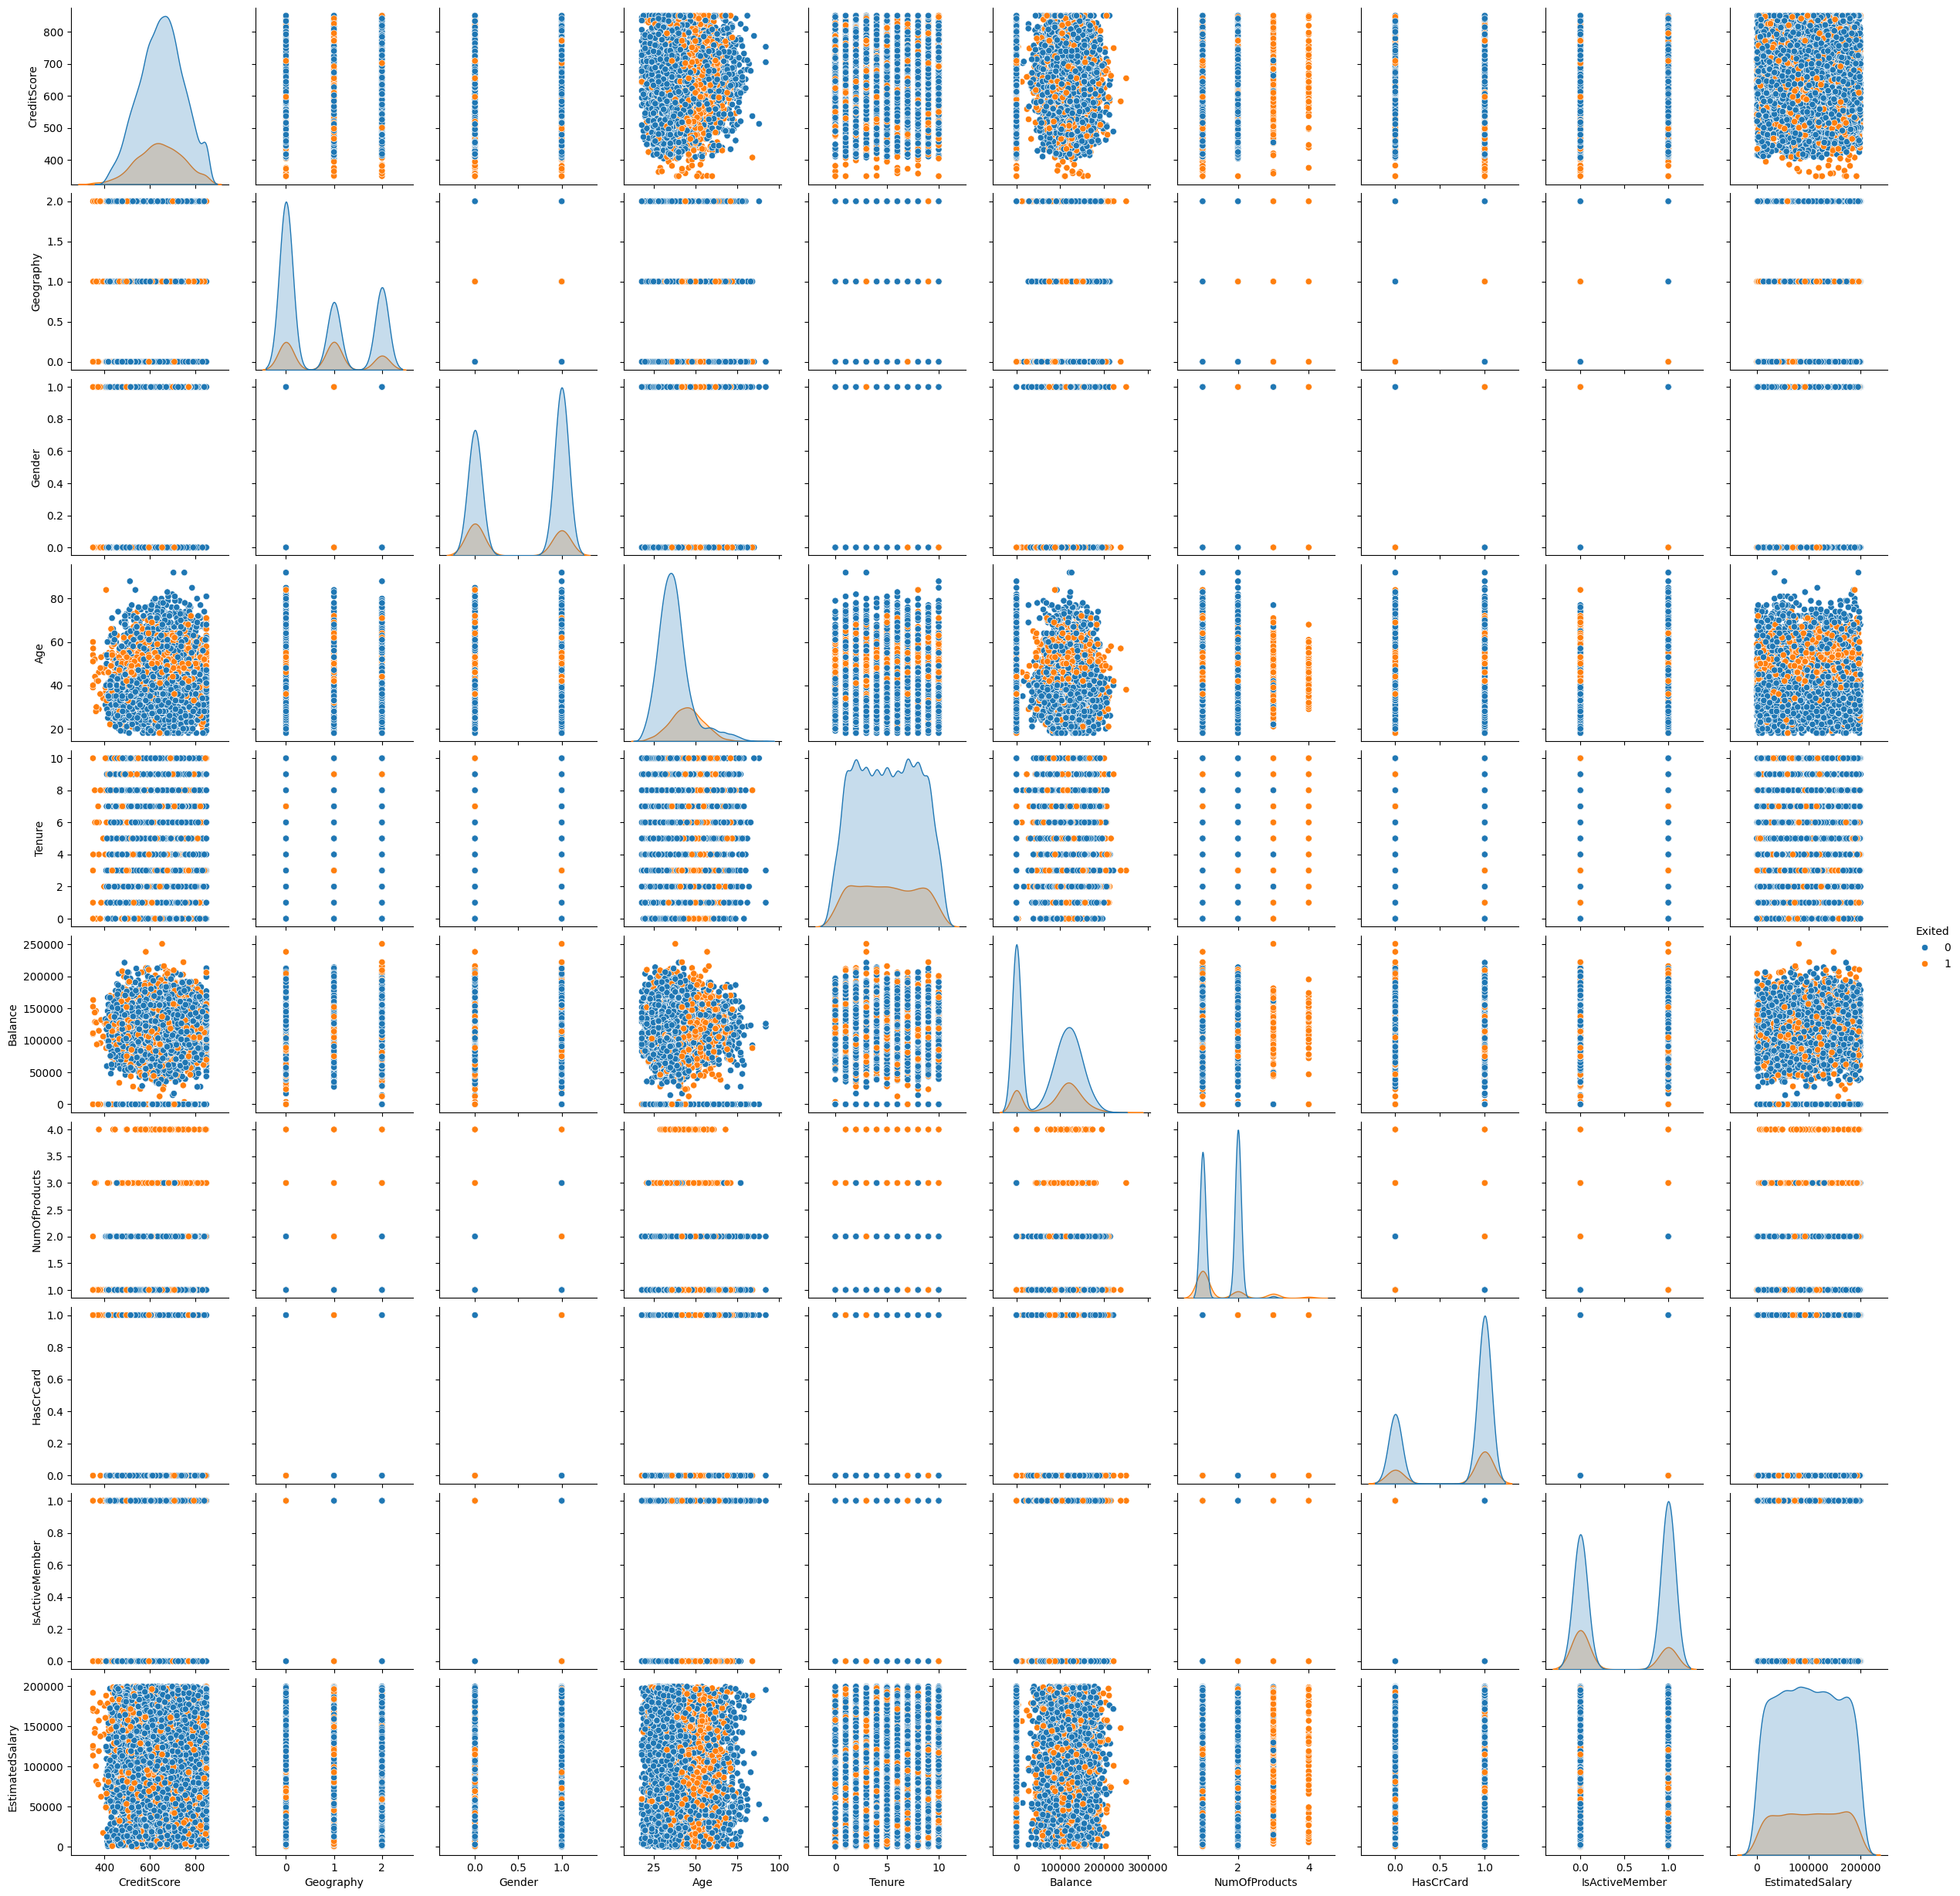

In [110]:
# pairplot
sns.pairplot(df, hue='Exited')
plt.show()